# AWS Public Blockchain - ETH Examples

In [4]:
pip install PyAthena


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import boto3
import pandas as pd
from pyathena import connect

In [6]:
S3_BUCKET=!(aws cloudformation list-exports --query "Exports[?Name=='public-blockchain-athena-results'].Value" --output text)
S3_BUCKET=S3_BUCKET[0]

In [7]:
conn = connect(s3_staging_dir='s3://'+S3_BUCKET+'/results/')

### Get number of blocks

In [12]:
df = pd.read_sql("select count(*) as block_count from eth.blocks", conn)
df

,block_count
0,15611306


### Get number of transactions per date

In [13]:
df = pd.read_sql("select date,sum(transaction_count) as tx_count from eth.blocks group by date order by date", conn)
df

,date,tx_count
0,2015-07-30,0
1,2015-07-31,0
2,2015-08-01,0
3,2015-08-02,0
4,2015-08-03,0
...,...,...
2596,2022-09-07,1068296
2597,2022-09-08,1008118
2598,2022-09-09,1093765
2599,2022-09-10,1002415


### Get details for block by number

In [14]:
block_number=1000000

In [15]:
df = pd.read_sql("select * from eth.blocks where number="+str(block_number), conn)
df.iloc[0]

timestamp                                          2016-02-13 22:54:13
number                                                         1000000
hash                 0x8e38b4dbf6b11fcc3b9dee84fb7986e29ca0a02cecd8...
parent_hash          0xb4fbadf8ea452b139718e2700dc1135cfc81145031c8...
nonce                                               0xcd4c55b941cf9015
sha3_uncles          0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...
logs_bloom           0x00000000000000000000000000000000000800000000...
transactions_root    0x65ba887fcb0826f616d01f736c1d2d677bcabde2f7fc...
state_root           0x0e066f3c2297a5cb300593052617d1bca5946f0caa06...
receipts_root        0x20e3534540caf16378e6e86a2bf1236d9f876d3218fb...
miner                       0x2a65aca4d5fc5b5c859090a6c34d164135398226
difficulty                                            12549332509227.0
total_difficulty                                 7135202464334938112.0
size                                                               768
extra_

### Get details for transaction

In [26]:
df = pd.read_sql("select * from eth.transactions where value>0 limit 1",conn)
df.iloc[0]

hash                           0x2447d89a23fee4e1b1c5add7db744861bea084f4b4f5...
nonce                                                                          2
transaction_index                                                              0
from_address                          0x2f753898c57b7ab6338e11aa6531288d6c5ca8a6
to_address                            0x5e032243d507c743b061ef021e2ec7fcc6d3ab89
value                                                       998959154422272896.0
gas                                                                        21000
gas_price                                                            51600000000
input                                                                         0x
receipt_cumulative_gas_used                                                21000
receipt_gas_used                                                           21000
receipt_contract_address                                                        
receipt_root                

### Get details for token_transfers

In [17]:
df = pd.read_sql("select * from eth.token_transfers where value>0 limit 1",conn)
df.iloc[0]

token_address              0xba3e14a7f0169d86fc1389ad40ca4356a1404640
from_address        0x000000000000000000000000e176d196224fbf33d779...
to_address          0x0000000000000000000000004503d787b07ba012689c...
value                                                        100000.0
transaction_hash    0x9a9083a4e82efe5afda44520ec2c3cec9bf2ca330149...
log_index                                                           2
block_timestamp                                   2016-05-27 10:07:37
block_number                                                  1593475
block_hash          0x4dda6b5588c7e120185f17bcbf8b212c74f791893550...
date                                                       2016-05-27
Name: 0, dtype: object

### Get details for logs

In [18]:
df = pd.read_sql("select * from eth.logs limit 1",conn)
df.iloc[0]

log_index                                                            0
transaction_hash     0x51ebcd0964d26fb081587135e4606da57e84d4c6cc01...
transaction_index                                                    0
address                     0x0155ce35fe73249fa5d6a29f3b4b7b98732eb2ed
data                 0x00000000000000000000000000000000000000000000...
topics               [0xf82c50f1848136e6c140b186ea0c768b7deda5efffe...
block_timestamp                                    2015-09-08 12:41:54
block_number                                                    202976
block_hash           0x5357f5bcc2ef22e75948224b9442dd2f06139b1a489f...
date                                                        2015-09-08
Name: 0, dtype: object

### Get details for traces

In [27]:
df = pd.read_sql("select * from eth.traces where value>0 limit 1",conn)
df.iloc[0]

transaction_hash     0x63c5bd4c251de4f533f25ad9f2fc166dbe67f5d1a088...
transaction_index                                                    0
from_address                0x390de26d772d2e2005c6d1d24afc902bae37a4bb
to_address                  0xc50c71aa5a35589fb1d5b528cb3a44b652cffb3b
value                                            6802065080000000000.0
input                                                               0x
output                                                              0x
trace_type                                                        call
call_type                                                         call
reward_type                                                       None
gas                                                            24000.0
gas_used                                                           0.0
subtraces                                                            0
trace_address                                                     None
error 

### Get details for contracts

In [20]:
df = pd.read_sql("select * from eth.contracts limit 1",conn)
df.iloc[0]

address                   0xb2f235648e55c848bbe7e06289fdbaf1826e518d
bytecode           0x606060405260e060020a600035046341c0e1b5811461...
block_timestamp                                  2015-12-15 15:36:34
block_number                                                  696211
block_hash         0x823064ec52bb72f7cc8fa9ca5af659014a5c7478a3fc...
date                                                      2015-12-15
Name: 0, dtype: object

## Charts

### Avgerage Gas Price over Time

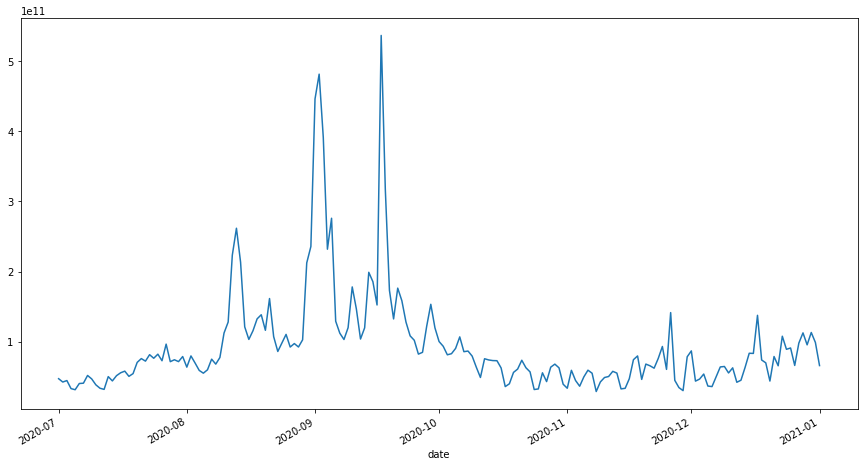

In [47]:
%matplotlib inline
df = pd.read_sql("select date,avg(receipt_effective_gas_price) as avg_gas from eth.transactions where receipt_status=1 and date>='2020-07-01' and date<='2021-01-01' group by date", conn)
df.set_index(pd.DatetimeIndex(df['date']),inplace=True)
del df['date']
df["avg_gas"].plot(figsize=(15,8))

### Transactions per Second

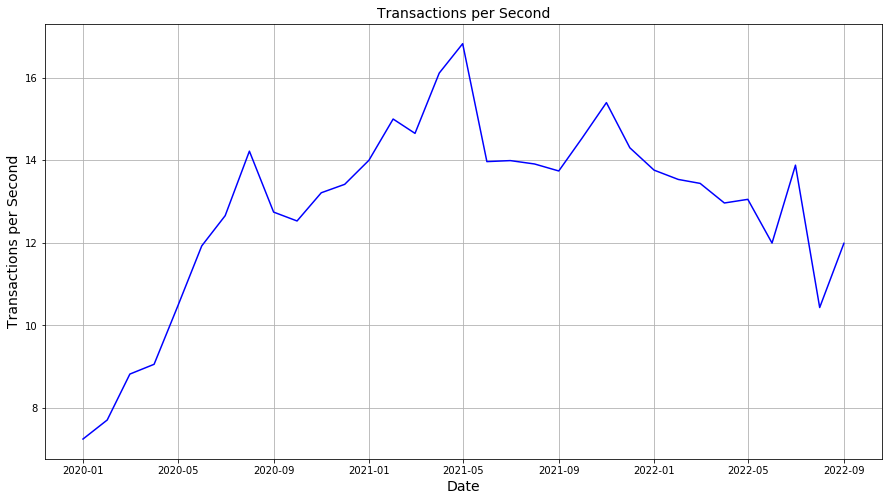

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_sql("""
with 
    eth_transactions as (select date_trunc('month',cast(date as date)) as date, avg(transactions_per_sec) as transactions_per_sec from (
    select date, cast(count(*) as double)/(24*60*60) as transactions_per_sec
    from eth.transactions
    where date>='2020-01-01'
    group by date) group by  date_trunc('month',cast(date as date)))
select * from eth_transactions bt order by bt.date
""", conn)
df.set_index(pd.DatetimeIndex(df['date']),inplace=True)
del df['date']

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(df.index, df['transactions_per_sec'], color='blue')
plt.title('Transactions per Second', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Transactions per Second', fontsize=14)
plt.grid(True)
plt.show()

### Historical Price Data

Please note the following charts require market data loaded first. Please run through ***load-marketdata.ipynb*** notebook first.

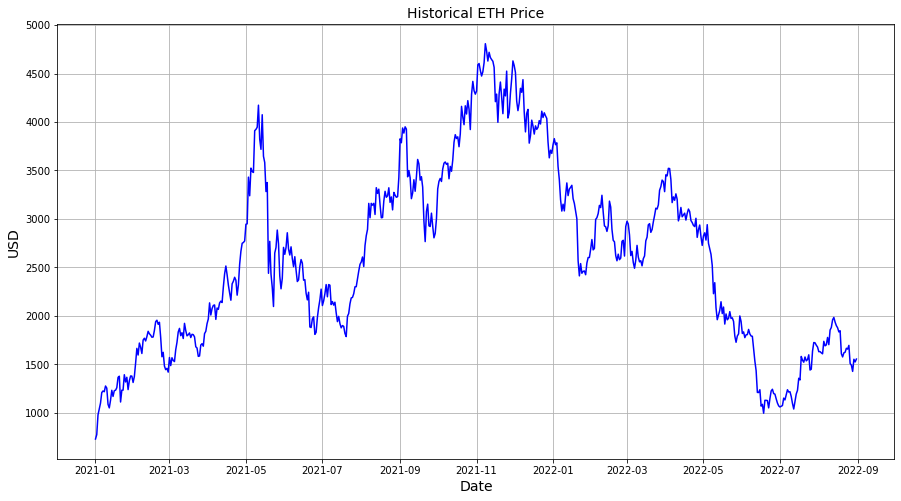

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_sql("""
SELECT CAST(open_time AS DATE) as date,close FROM marketdata.crypto where ticker='ETHUSDT' and extract(MINUTE from open_time)=59 and extract(HOUR from open_time)=23 and open_time > TIMESTAMP '2021-01-01 00:00:00' order by open_time
""", conn)
df.set_index(pd.DatetimeIndex(df['date']),inplace=True)
del df['date']

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(df.index, df['close'], color='blue')
plt.title('Historical ETH Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.grid(True)
plt.show()

### Weekly Transaction Volume (USD)

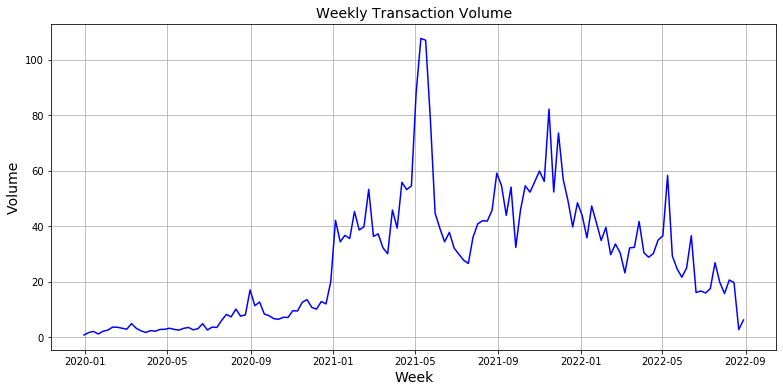

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_sql("""
WITH 
  daily_amt_eth AS (SELECT cast(date AS date) AS date, sum(value/1000000000000000000) AS amt FROM eth.transactions where receipt_status=1 and date>='2018-01-01' GROUP BY date),
  daily_price_eth as (SELECT cast(open_time AS DATE) AS date, close AS price FROM marketdata.crypto where ticker='ETHUSDT' and extract(MINUTE FROM open_time)=59 and extract(HOUR FROM open_time)=23 and open_time >= TIMESTAMP '2020-01-01 00:00:00')
 SELECT date_trunc('week', date) AS week, sum(transaction_volume) / 1000000000 AS transaction_volume, avg(price) AS price FROM (SELECT A.date, B.amt * A.price AS transaction_volume, a.price FROM daily_price_eth A JOIN daily_amt_eth B ON A.date=B.date) GROUP BY date_trunc('week', date) ORDER BY date_trunc('week',date)
""", conn)
df.set_index(pd.DatetimeIndex(df['week']),inplace=True)

plt.rcParams["figure.figsize"] = (13,6)
plt.plot(df.index, df['transaction_volume'], color='blue')
#plt.plot(df.index, df['transaction_volume_btc'], color='blue', label="ETH")
plt.title('Weekly Transaction Volume', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.show()